### 计算扎根——机器学习+可解释性机器学习

In [3]:
# 安装相关包
! pip install shap

###连续变量的计算扎根

In [4]:
# 回归数据的模型训练——波士顿房价
import pandas as pd
df = pd.read_csv("boston_house_prices.csv")
print(df.shape)
df.head(5) # 查看前5行数据

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 数据变量介绍
每条记录都记录了波士顿的一个郊区或城镇

| 变量名   | 变量描述                           | 值类型            |
|----------|------------------------------------|-------------------|
| CRIM     | 犯罪率 (Ratio)                     | 数值-连续-比率    |
| ZN       | 住宅占地比 (Ratio)                 | 数值-连续-比率    |
| INDUS    | 非零售商业用地面积比例 (Ratio)           | 数值-连续-比率    |
| CHAS     | 是否临近查尔斯河 (Boolean)                 | 分类              |
| NOX      | 一氧化碳浓度 (Ratio, per 10 million) | 数值-连续-比率    |
| RM       | 每个住宅平均房间数 (Number)        | 数值-离散-数量    |
| AGE      | 建于1940年前的房屋占比 (Ratio)     | 数值-连续-比率    |
| DIS      | 到波士顿五个就业中心的加权距离 (Number)  | 数值-离散-数量    |
| RAD      | 公路通达性指数 (Index)             | 数值-离散-指数    |
| TAX      | 税率 (Ratio, per $10,000)          | 数值-连续-比率    |
| PTRATIO  | 师生比 (Ratio)                     | 数值-连续-比率    |
| B        | 黑人指数 (Index) $B=1000(B_k-0.63)^2$ | 数值-连续-指数    |
| LSTAT    | 低收入人口比率 (Ratio)             | 数值-连续-比率    |
| MEDV     | 房价中位数 (Number)            | 数值-离散-数量    |


In [5]:
#数据分割：划分训练集与测试集（70% 训练，30% 测试）
from sklearn.model_selection import train_test_split
X = df.drop('MEDV', axis=1)  # 特征矩阵
y = df['MEDV']  # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # random_state固定随机种子，确保结果可复现

In [6]:
#训练一个线性回归模型
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model_liner = LinearRegression()
model_liner.fit(X_train, y_train)  # 模型训练

#模型评估
y_pred = model_liner.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
r2=r2_score(y_test, y_pred)
print("R² :", r2)

MSE: 21.517444231177127
R² : 0.7112260057484943


In [7]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model_liner.coef_[i].round(5))

Model coefficients:

CRIM = -0.13347
ZN = 0.03581
INDUS = 0.04952
CHAS = 3.11984
NOX = -15.41706
RM = 4.0572
AGE = -0.01082
DIS = -1.386
RAD = 0.24273
TAX = -0.0087
PTRATIO = -0.91069
B = 0.01179
LSTAT = -0.54711


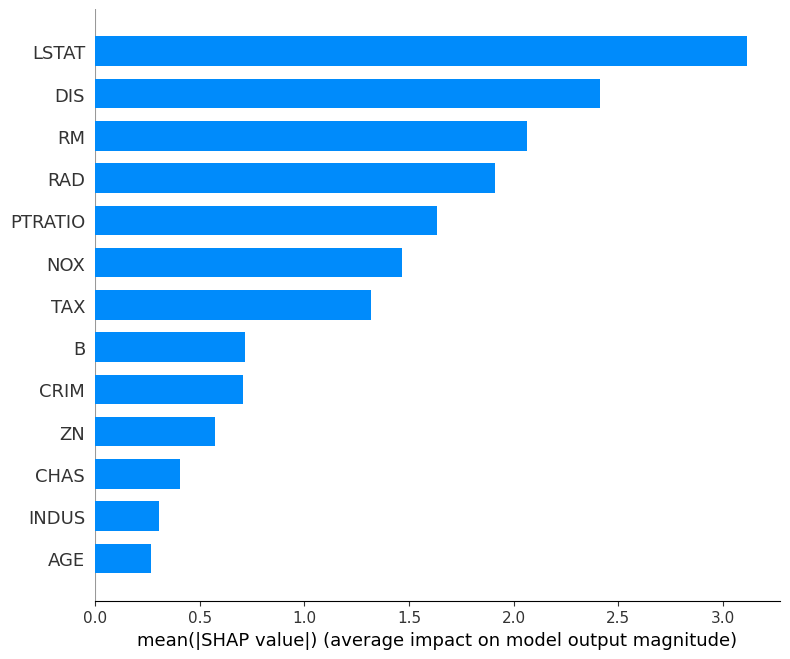

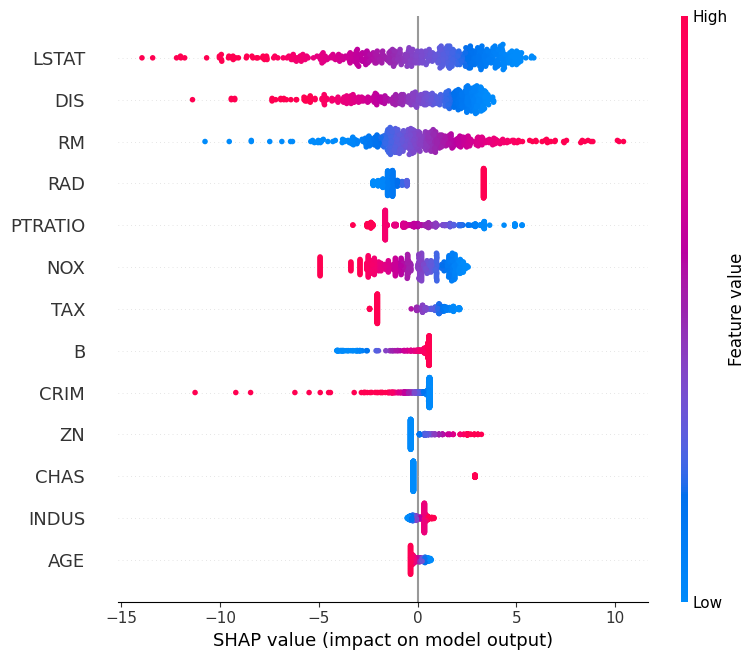

In [12]:
#使用 SHAP 进行可解释性分析
import shap
shap.initjs()
import matplotlib.pyplot as plt
explainer = shap.Explainer(model_liner, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type="bar")
shap.summary_plot(shap_values, X, feature_names=X.columns)

Plotting dependence plot for feature: CRIM


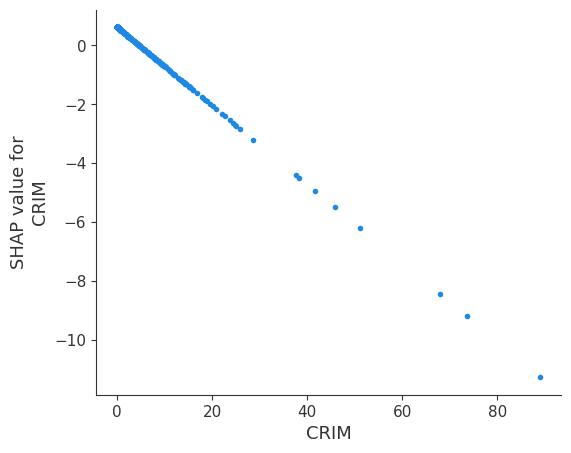

Plotting dependence plot for feature: ZN


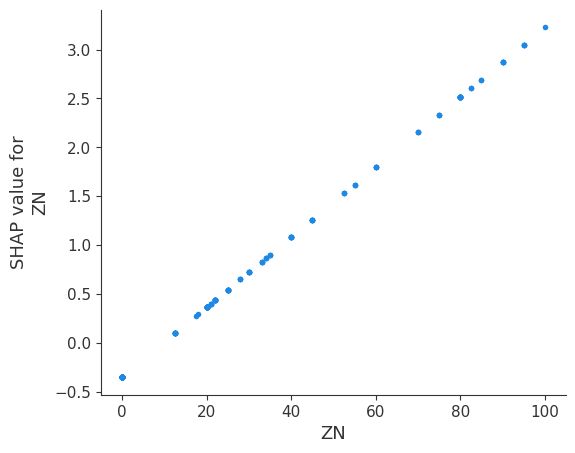

Plotting dependence plot for feature: INDUS


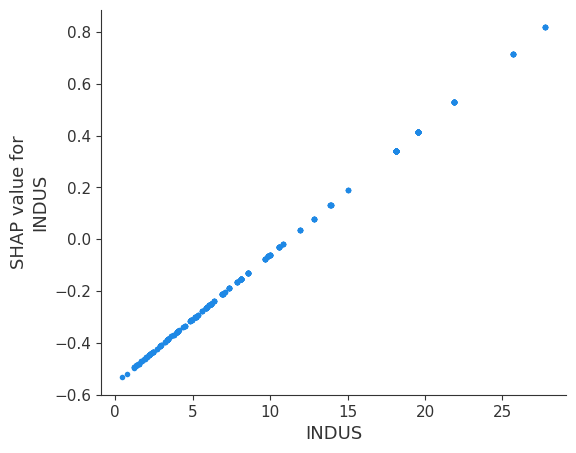

Plotting dependence plot for feature: CHAS


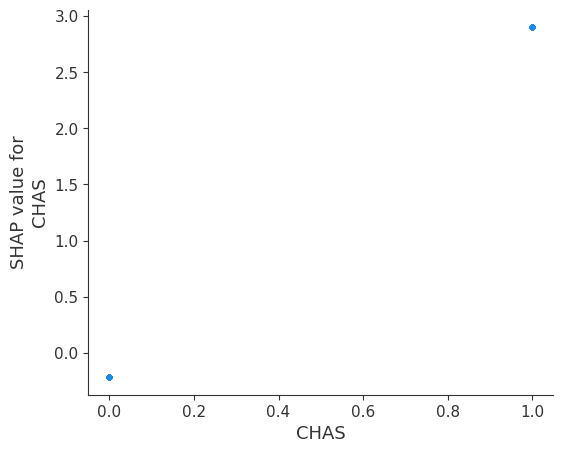

Plotting dependence plot for feature: NOX


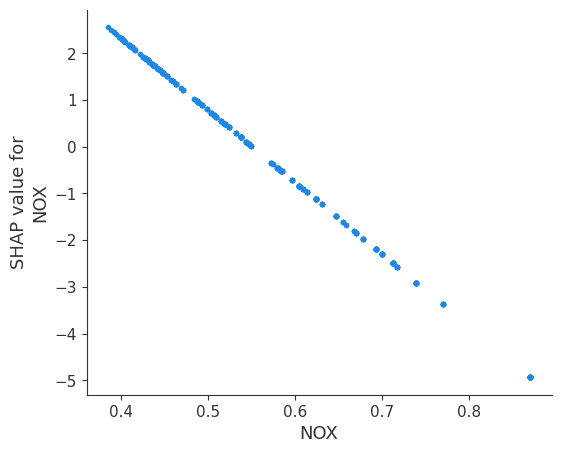

Plotting dependence plot for feature: RM


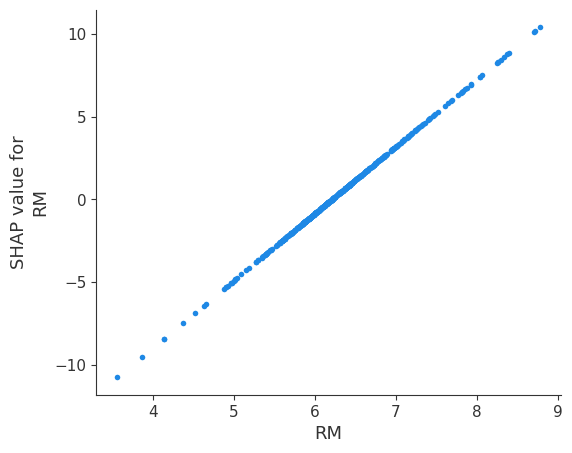

Plotting dependence plot for feature: AGE


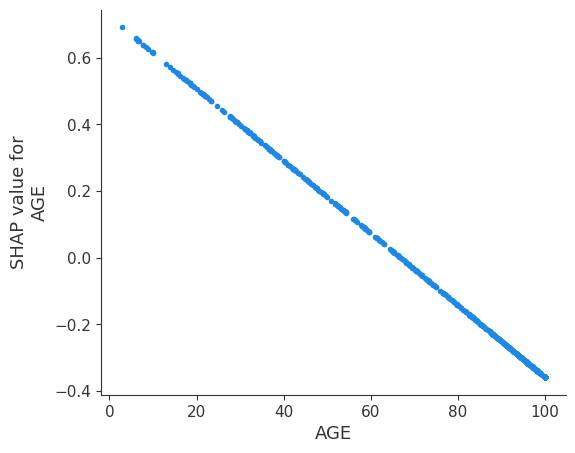

Plotting dependence plot for feature: DIS


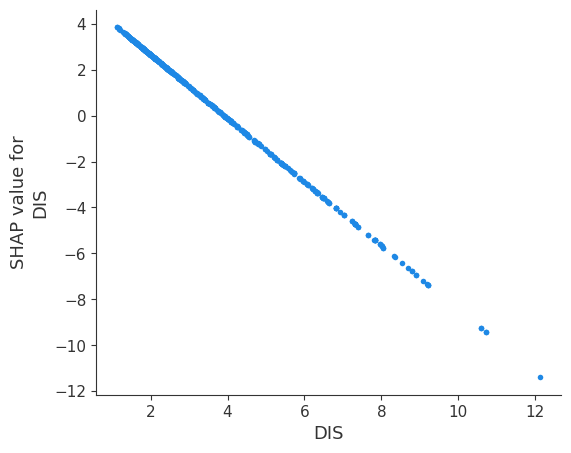

Plotting dependence plot for feature: RAD


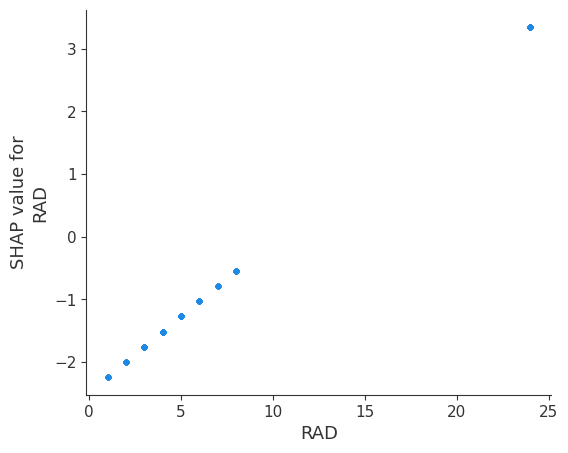

Plotting dependence plot for feature: TAX


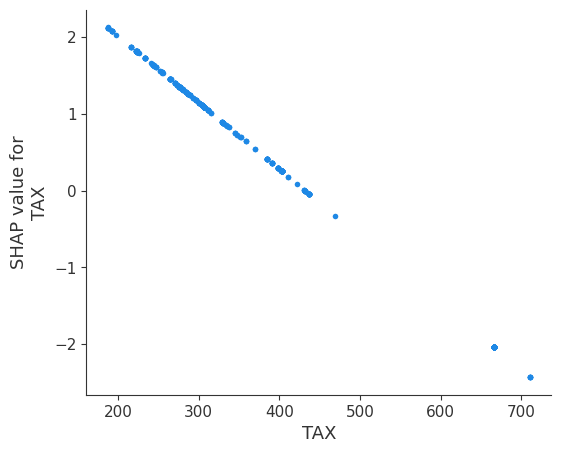

Plotting dependence plot for feature: PTRATIO


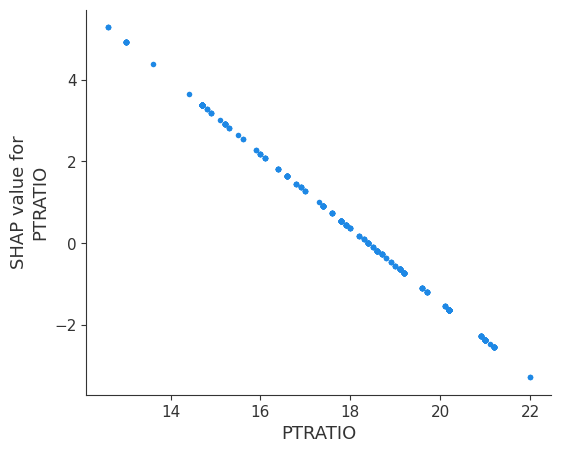

Plotting dependence plot for feature: B


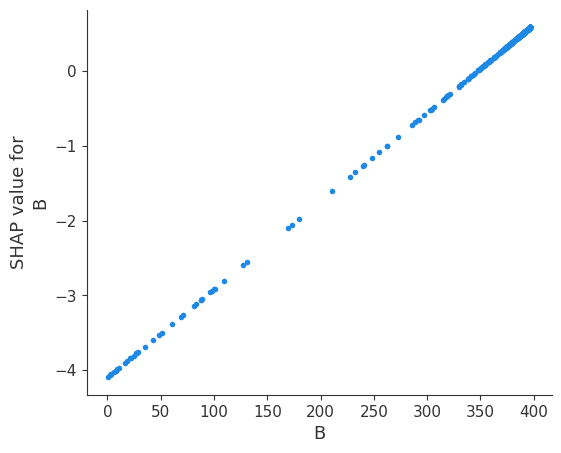

Plotting dependence plot for feature: LSTAT


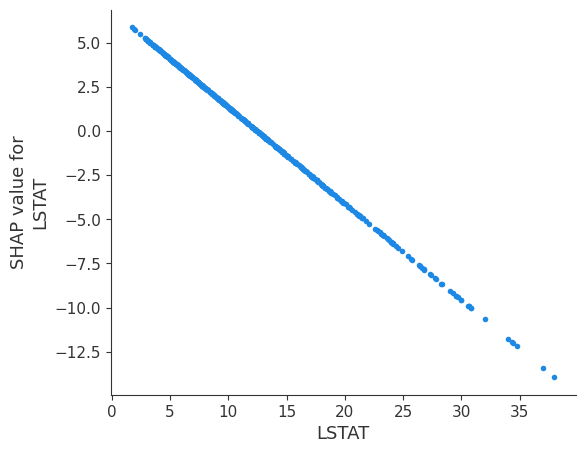

In [20]:
for feature in X.columns:
    print(f"Plotting dependence plot for feature: {feature}")
    shap.dependence_plot(
        ind=feature,
        shap_values=shap_values.values,
        features=X,
        feature_names=X.columns,
        interaction_index=None, #'auto', 
        show=True  # show=True 可选，确保每个图都显示
    )

In [13]:
shap.plots.force(shap_values[0, ...])

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Bayesian Ridge": BayesianRidge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR (RBF Kernel)": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])

    results.append({
        'Model': name,
        'R²': round(r2, 4),
        'Adjusted R²': round(adj_r2, 4),
        'MSE': round(mse, 4)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Adjusted R²', ascending=False)
results_df

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Bayesian Ridge...
Training Decision Tree...
Training Random Forest...
Training SVR (RBF Kernel)...
Training Gradient Boosting...
Training XGBoost...


,Model,R²,Adjusted R²,MSE
7,Gradient Boosting,0.8908,0.8805,8.1374
8,XGBoost,0.8730,0.8610,9.4666
5,Random Forest,0.8697,0.8574,9.7116
4,Decision Tree,0.8546,0.8409,10.8327
0,Linear Regression,0.7112,0.6840,21.5174
2,Lasso Regression,0.7088,0.6814,21.6962
1,Ridge Regression,0.7042,0.6763,22.0441
3,Bayesian Ridge,0.6950,0.6662,22.7293
6,SVR (RBF Kernel),0.2820,0.2143,53.5037


In [27]:
model_GBR=GradientBoostingRegressor(n_estimators=100, random_state=42)
model_GBR.fit(X_train, y_train)
y_pred = model_GBR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
print("r2",r2)
print("adj_r2",adj_r2)
print("MSE:", mse)

r2 0.8907929176394638
adj_r2 0.8805052939388336
MSE: 8.137357764618558


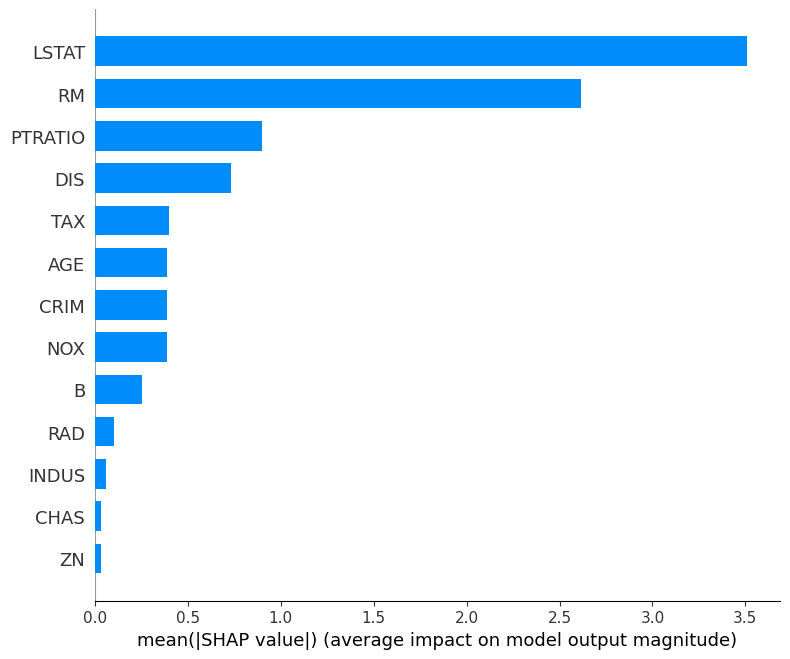

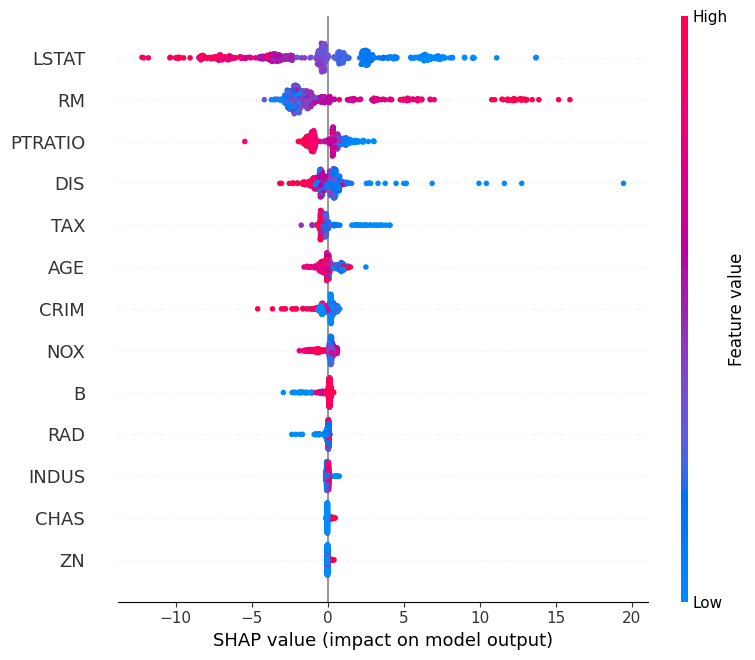

In [28]:
shap.initjs()
explainer = shap.TreeExplainer(model_GBR)
shap_values = explainer(X)
shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type="bar")
shap.summary_plot(shap_values, X, feature_names=X.columns)

Plotting dependence plot for feature: CRIM


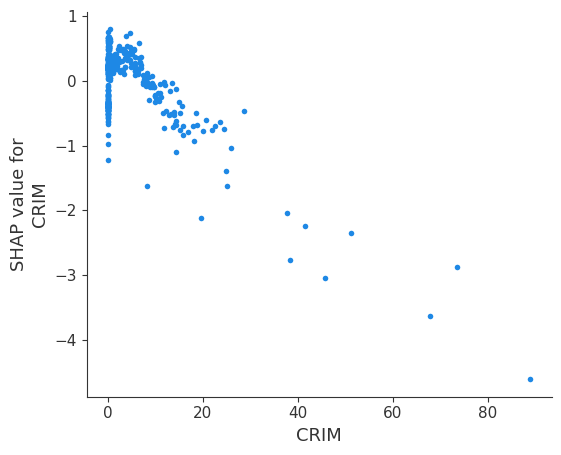

Plotting dependence plot for feature: ZN


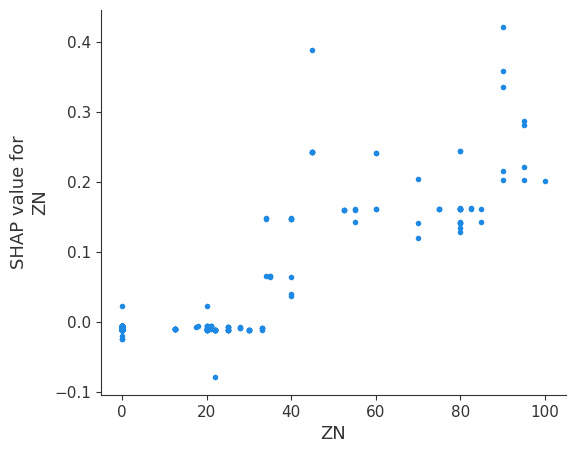

Plotting dependence plot for feature: INDUS


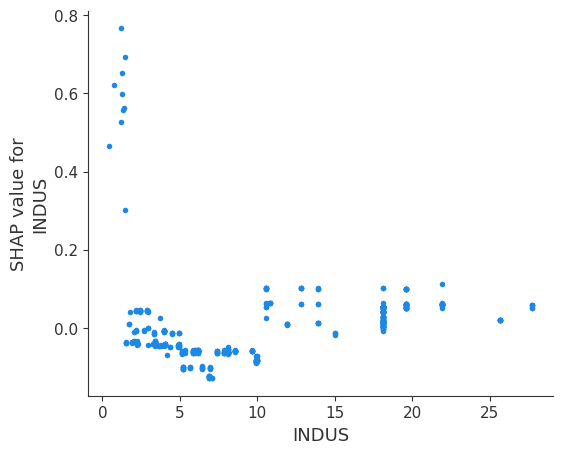

Plotting dependence plot for feature: CHAS


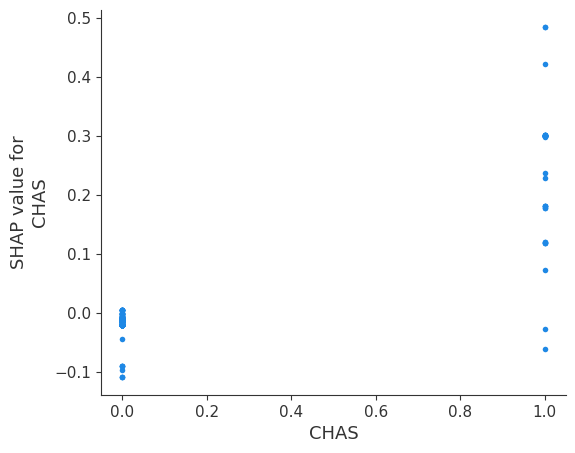

Plotting dependence plot for feature: NOX


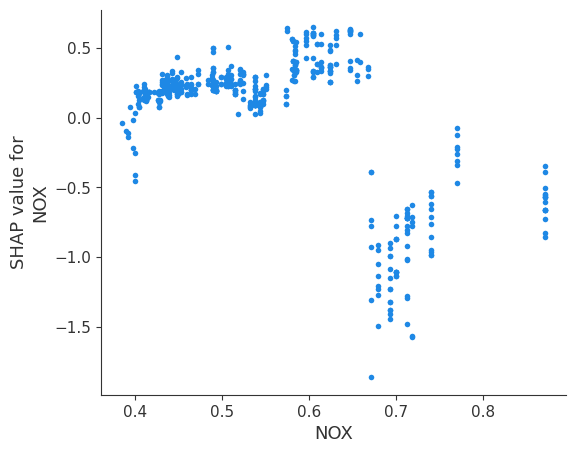

Plotting dependence plot for feature: RM


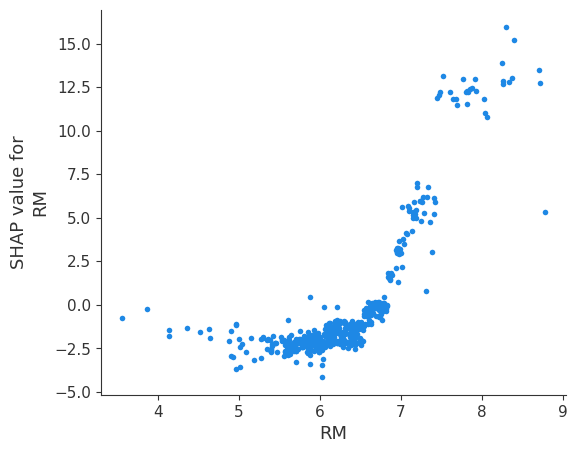

Plotting dependence plot for feature: AGE


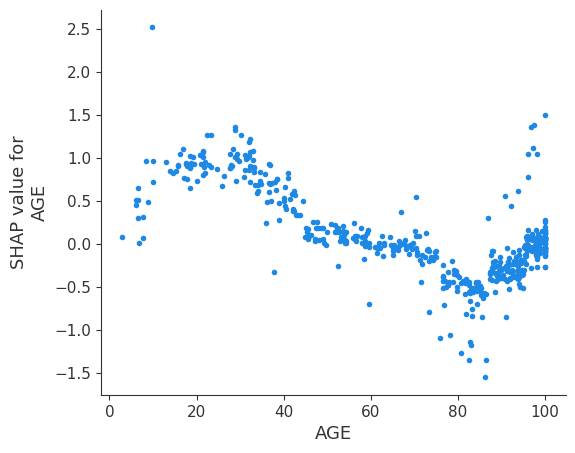

Plotting dependence plot for feature: DIS


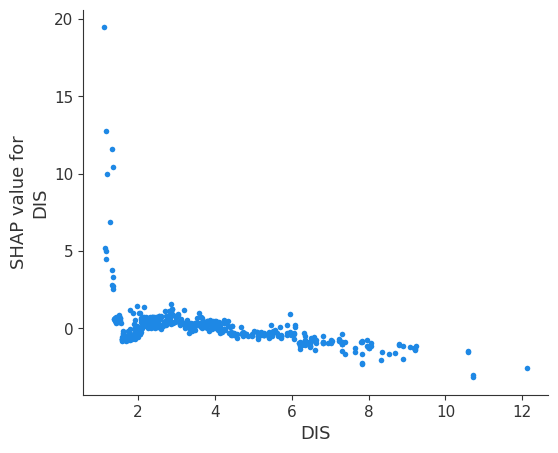

Plotting dependence plot for feature: RAD


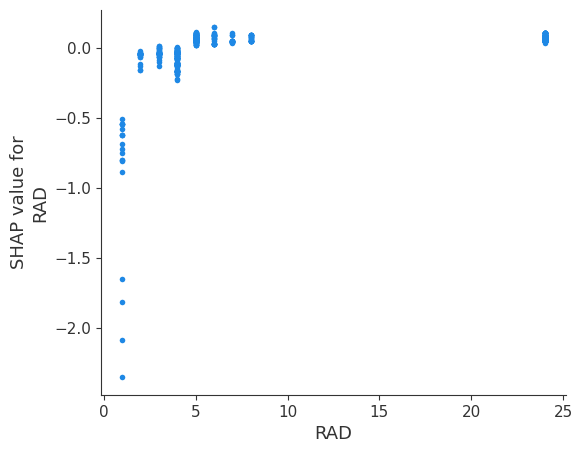

Plotting dependence plot for feature: TAX


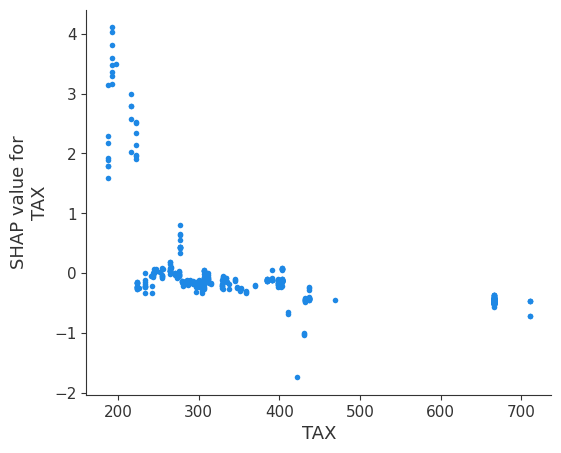

Plotting dependence plot for feature: PTRATIO


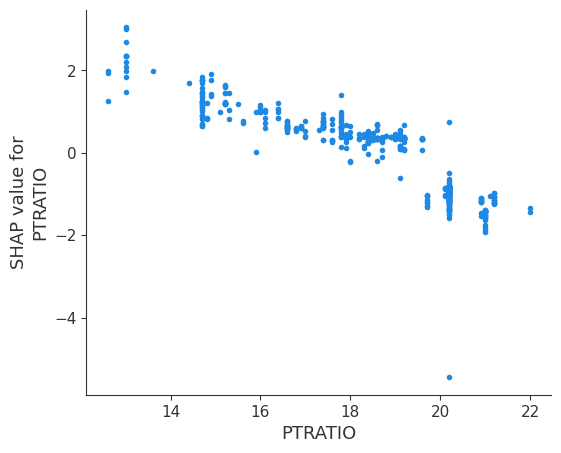

Plotting dependence plot for feature: B


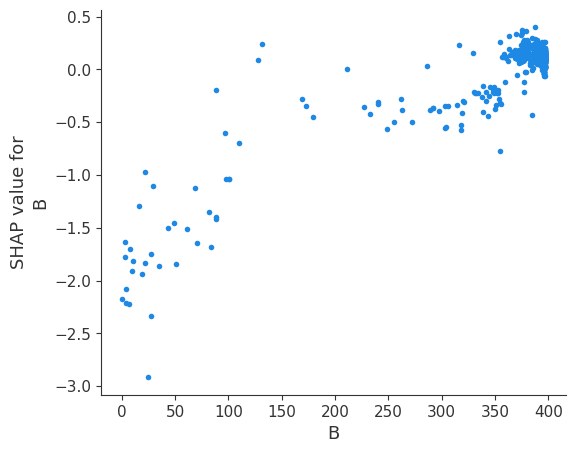

Plotting dependence plot for feature: LSTAT


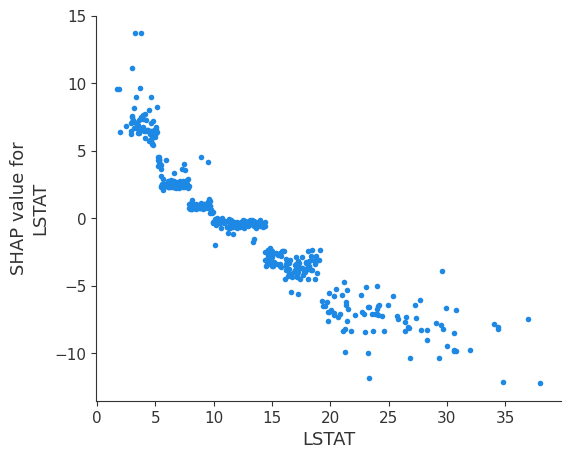

In [29]:
for feature in X.columns:
    print(f"Plotting dependence plot for feature: {feature}")
    shap.dependence_plot(
        ind=feature,
        shap_values=shap_values.values,
        features=X,
        feature_names=X.columns,
        interaction_index=None, #'auto', 
        show=True  # show=True 可选，确保每个图都显示
    )

### 分类变量的计算扎根

In [71]:
## 分类问题，以Iris数据集为例子
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
iris_df = pd.read_csv("iris.csv")
print(iris_df.shape)
iris_df.head(5) # 查看前5行数据
X = iris_df.drop(['target','target_name'], axis=1)   # 特征
y = iris_df['target']  # 标签（类别）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_RF = RandomForestClassifier(n_estimators=10, random_state=42)
model_RF.fit(X_train, y_train)

(150, 6)


RandomForestClassifier(n_estimators=10, random_state=42)

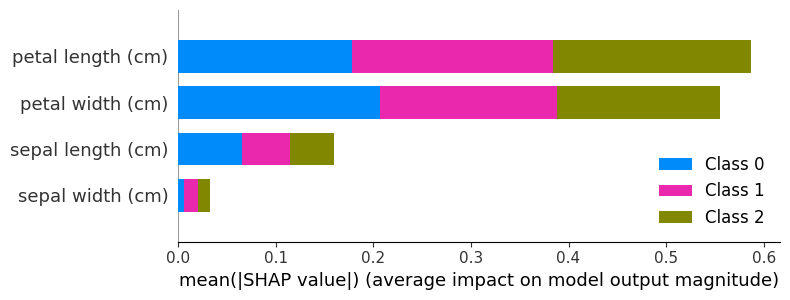

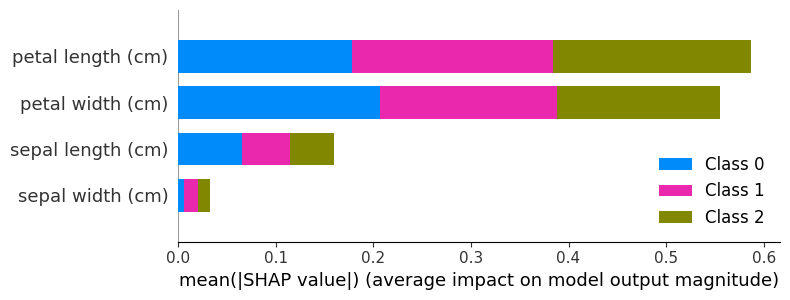

In [72]:
shap.initjs()
explainer = shap.TreeExplainer(model_RF)
shap_values = explainer(X)
shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type="bar")
shap.summary_plot(shap_values, X, feature_names=X.columns)

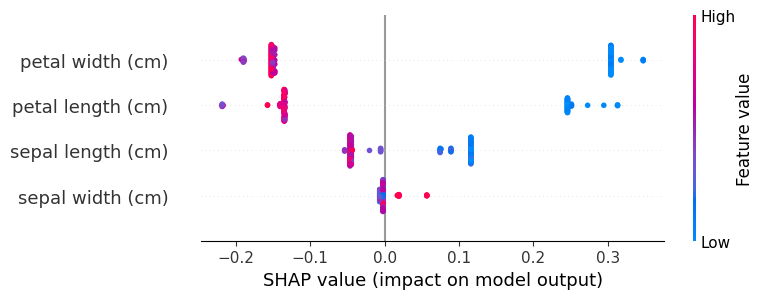

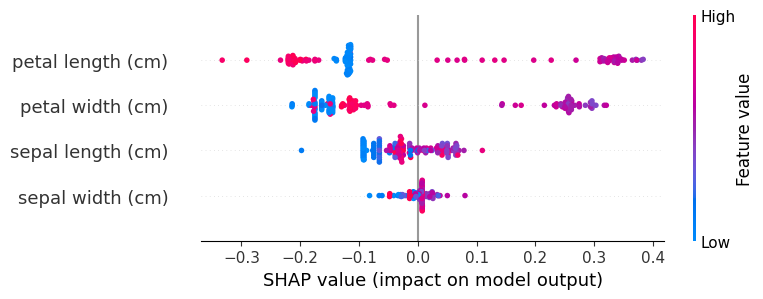

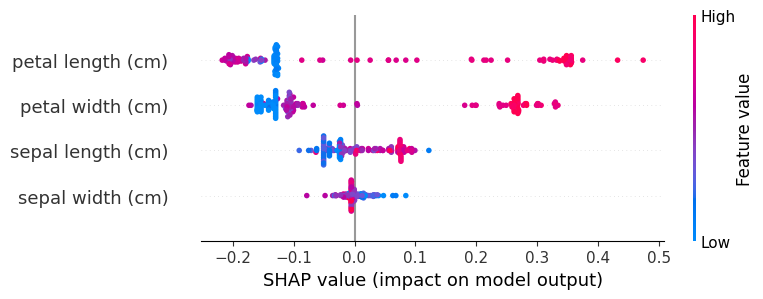

In [73]:
shap.summary_plot(shap_values[:, :, 0], X, feature_names=X.columns)
shap.summary_plot(shap_values[:, :, 1], X, feature_names=X.columns)
shap.summary_plot(shap_values[:, :, 2], X, feature_names=X.columns)

In [74]:
shap_values[:, :, 0].shape

(150, 4)

Plotting dependence plot for feature: sepal length (cm)


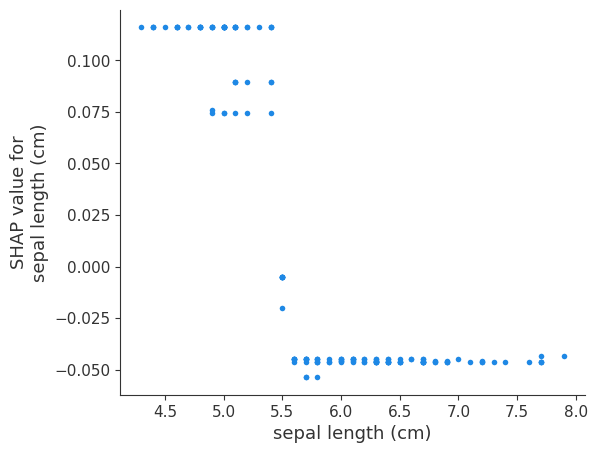

Plotting dependence plot for feature: sepal width (cm)


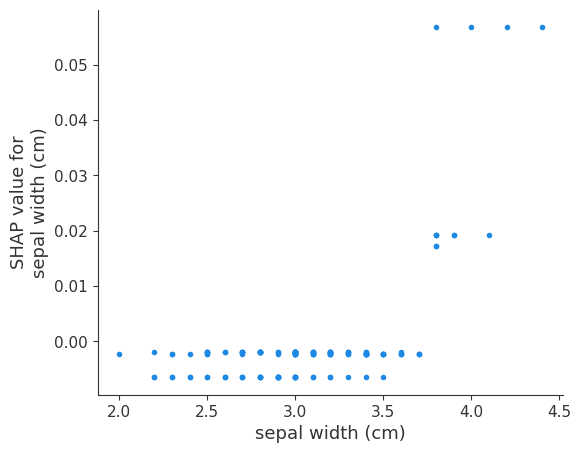

Plotting dependence plot for feature: petal length (cm)


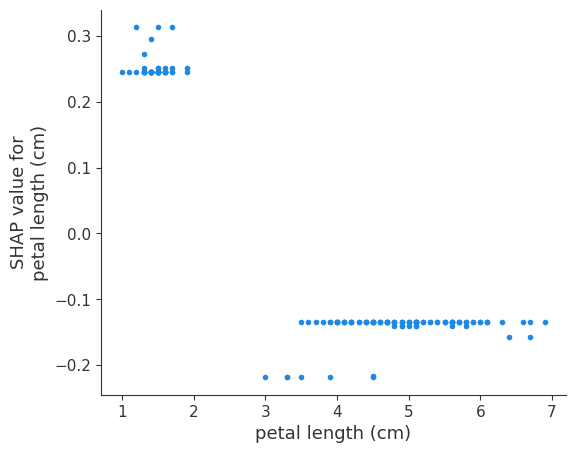

Plotting dependence plot for feature: petal width (cm)


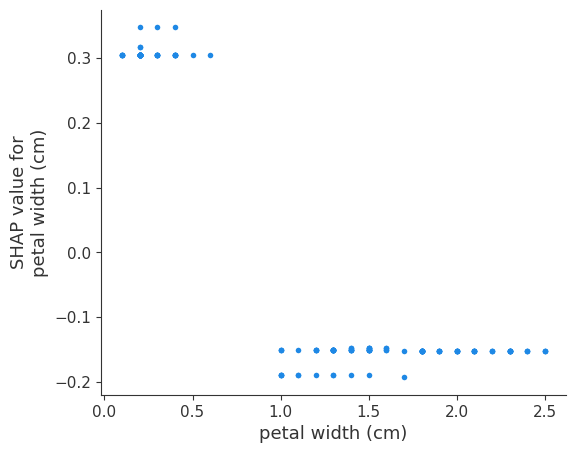

In [75]:
for feature in X.columns:
    print(f"Plotting dependence plot for feature: {feature}")
    shap.dependence_plot(
        ind=feature,
        shap_values=shap_values[:, :, 0].values,
        features=X,
        feature_names=X.columns,
        interaction_index=None, #'auto', 
        show=True  # show=True 可选，确保每个图都显示
    )